In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import HuberRegressor

# Task 1

## 1. Load and plot the data

In [2]:
df1 = pd.read_csv('p3_task-1.csv')

In [3]:
df1.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


<Axes: xlabel='x', ylabel='y'>

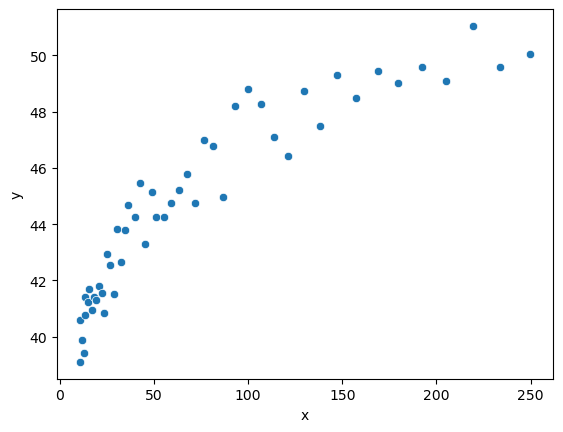

In [4]:
sns.scatterplot(x=df1.x, y=df1.y)

The values are not linear and, for this reason, it is necessary to transform them with a log function

## 2. Define a new variable log(x) and transform the data.

In [5]:
df1['logx'] = df1.eval('log(x)')

In [6]:
df1.head()

,x,y,logx
0,10.529,39.105,2.354133
1,10.799,40.584,2.379454
2,11.698,39.883,2.459418
3,12.851,39.411,2.553422
4,13.565,40.760,2.607493


<Axes: xlabel='logx', ylabel='y'>

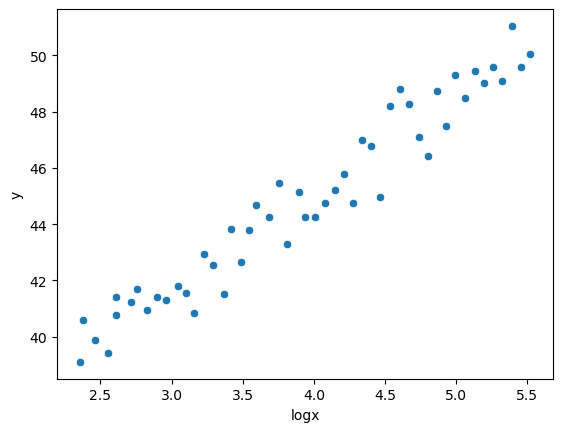

In [7]:
sns.scatterplot(x=df1.logx, y=df1.y)

Now that they have been transformed and are linear, it is possible to fit them with a linear function

## 3. Fit a model to the new data

In [8]:
### Use polyfit to fit y and log(x) with order 1
coefs = poly.polyfit(df1.logx, df1.y, 1)
print("Coefficients:", coefs)

Coefficients: [31.52920122  3.390241  ]


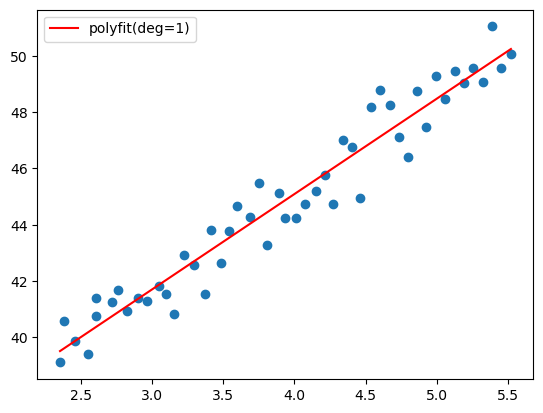

In [9]:
# Generate a hundred values between min(log(x)) and max(log(x))
x_values = np.linspace(df1.logx.min(), df1.logx.max(), num=100)

# Compute the associate y values
y_values = coefs[0] + coefs[1] * x_values

plt.scatter(df1.logx, df1.y)
plt.plot(x_values, y_values, 'r', label="polyfit(deg=1)")
plt.legend()

A linear function is the perfect fit for the transformed data

## 4. Plot the logarithmic curve against the original data

To plot the original data with the fit, it is necessary to convert **x_values** used for the fit to **exp(x_values)**

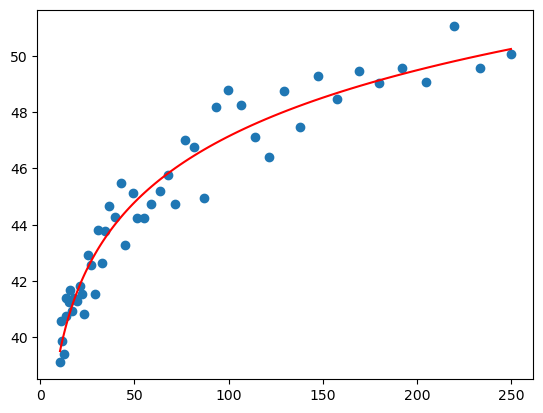

In [10]:
plt.scatter(df1.x, df1.y)
plt.plot(np.exp(x_values), y_values, 'r')

## 5. Compute the RSS and $R^2$ measures

In [11]:
### Make predictions
y_pred = poly.polyval(df1.logx, coefs)

###  Create a function that compute the RSS
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

### Compute the RSS for the baseline and the model
rss_baseline = RSS(df1.y, df1.y.mean())
rss_model = RSS(df1.y, y_pred)

print("RSS baseline:", rss_baseline)
print("RSS model:", rss_model)

### Compute R-square
r2 = 1 - rss_model/rss_baseline

print("R^2:", r2)

RSS baseline: 541.1432872199999
RSS model: 31.842651752756776
R^2: 0.9411567093138287


## 6. Discuss the results

RSS for the baseline has been computed using the mean of the **y** values.  
RSS for the model has been computed using `numpy.polynomial.polynomial.polyval` and predict the output with the feature **x**.   
$RSS_{baseline} > RSS_{model}$ because the mean of **y** cannot be assumed as a good prediction.  
$R^2$ is close to one, thus our model performs better than the baseline.

# Task 2

In [12]:
df2 = pd.read_csv('p3_task-2.csv')

In [13]:
df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [14]:
df2.shape

(1000, 4)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   y       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [16]:
### Create X and y variables
X = df2.drop(columns='y')
y = df2.y

### Apply train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'Size of training data: {X_train.shape}')
print(f'Size of test data: {X_test.shape}')

Size of training data: (800, 3)
Size of test data: (200, 3)


C:\Users\enric\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enric\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\enric\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x3', ylabel='Count'>

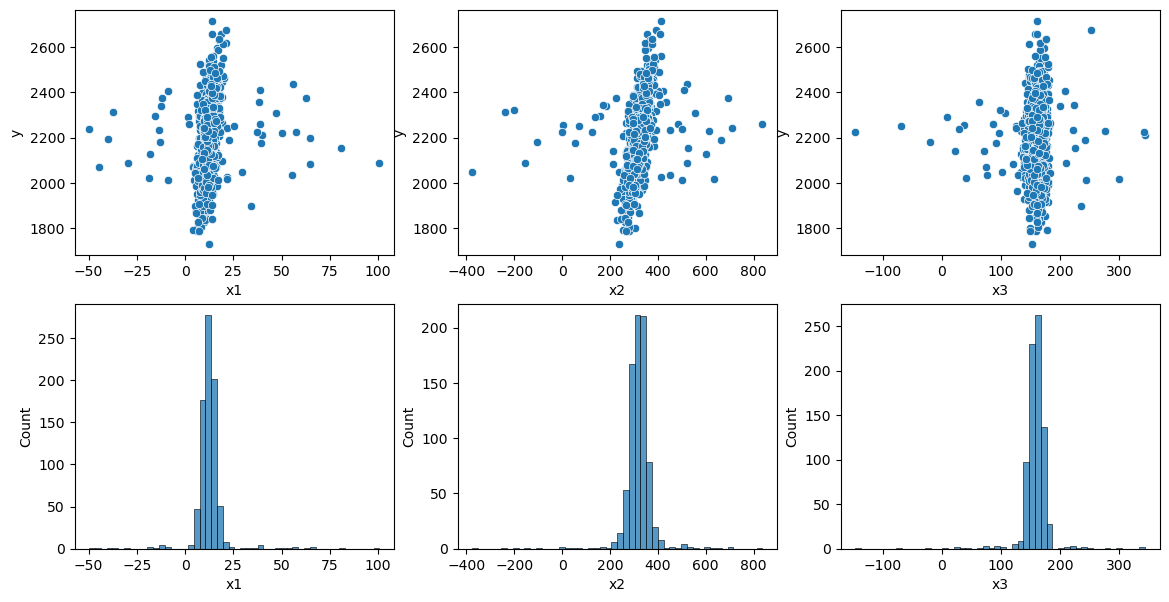

In [17]:
plt.figure(figsize=(14,7))
plt.subplot(231)
sns.scatterplot(x=X_train.x1, y=y_train)
plt.subplot(232)
sns.scatterplot(x=X_train.x2, y=y_train)
plt.subplot(233)
sns.scatterplot(x=X_train.x3, y=y_train)
plt.subplot(234)
sns.histplot(X_train.x1, bins=50)
plt.subplot(235)
sns.histplot(X_train.x2, bins=50)
plt.subplot(236)
sns.histplot(X_train.x3, bins=50)
# plt.legend()

As shown in the histograms, the variable distribution are almost simmetric and it is possible to identify few outliers for each variable

## Build models

### 1. Linear regression to the data with outliers

In [18]:
### Define the model
lr_wo = LinearRegression()
### Fit the model on the training data
lr_wo.fit(X_train, y_train)
### Predict the test data
y_pred_lr_wo = lr_wo.predict(X_test)
### Compute the mean absolute error between the y_pred and y_true
mae_lr_wo = mean_absolute_error(y_pred_lr_wo, y_test)
print(f'Linear regression MAE with outliers: {mae_lr_wo}')

Linear regression MAE with outliers: 104.78843301492127


### 2. Huber regression to the data with outliers

In [19]:
### Define the model
hr_wo = HuberRegressor()
### Fit the model on the training data
hr_wo.fit(X_train, y_train)
### Predict the test data
y_pred_hr_wo = hr_wo.predict(X_test)
### Compute the mean absolute error between the y_pred and y_true
mae_hr_wo = mean_absolute_error(y_pred_hr_wo, y_test)
print(f'Huber regression MAE with outliers: {mae_hr_wo}')

Huber regression MAE with outliers: 83.90812374211153


### 3. Linear regression to the data without outliers

In [20]:
X_train.describe()

,x1,x2,x3
count,800.000000,800.000000,800.000000
mean,12.414394,318.736139,158.183629
std,8.795636,71.723179,26.196022
min,-49.652000,-375.335000,-146.921000
25%,9.829500,296.497250,151.861500
50%,12.220000,321.456000,159.327500
75%,14.297000,342.331000,166.360750
max,100.692000,836.358000,344.797000


<Axes: >

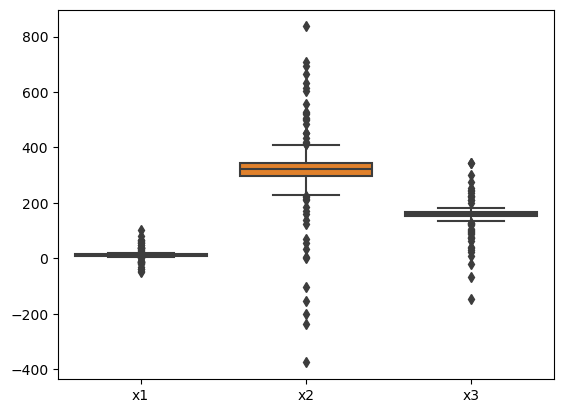

In [21]:
sns.boxplot(X_train)

As shown in the boxplots, the distribution are simmetric and there are data that can be assumed as outliers.  
To remove outliers, let's use the **z-score**

In [22]:
### Define a function to remove outliers
def remove_outliers(col):
    z = np.abs(stats.zscore(col, nan_policy='omit'))
    z_method = col.loc[np.where(abs(z) <= 2)]
    return z_method

In [23]:
### Create new X and y training to remove outliers
X_train_no = X_train.reset_index(drop=True).copy()
y_train_no = y_train.reset_index(drop=True).copy()

### Remove outliers using the pre-defined function
X_train_no = X_train_no.apply(lambda x: remove_outliers(x)).dropna()
y_train_no = y_train_no.loc[X_train_no.index]

<Axes: >

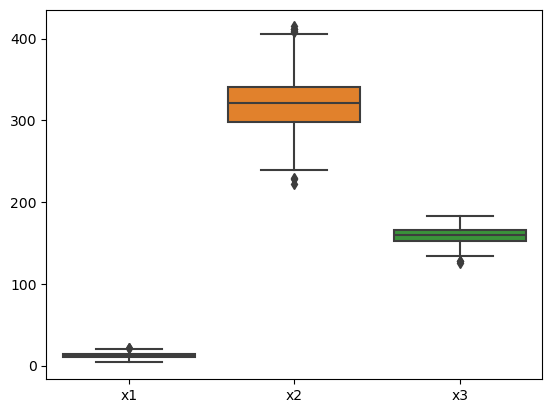

In [24]:
sns.boxplot(X_train_no)

In [25]:
print(f'The new shape of the training data is {X_train_no.dropna().shape}')

The new shape of the training data is (755, 3)


In [26]:
lr_woo = LinearRegression()
lr_woo.fit(X_train_no, y_train_no)
y_pred_lr_woo = lr_woo.predict(X_test)
mae_lr_woo = mean_absolute_error(y_pred_lr_woo, y_test)
print(f'Linear regression MAE without outliers: {mae_lr_woo}')

Linear regression MAE without outliers: 69.30261030814661


## Discussion of the results

The Huber regression (MAE=84) performs better than the linear regression (MAE=105).   
To handle outliers, all the training features with z-score > 2 have been removed.    
Without outliers the linear regression performs better, going from MAE=105 to MAE=69.    